In [90]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

## Task 1

In [91]:
df = pd.read_csv('Mall_Customers.csv')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [92]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [93]:
df.drop('CustomerID', axis=1, inplace=True)

In [94]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

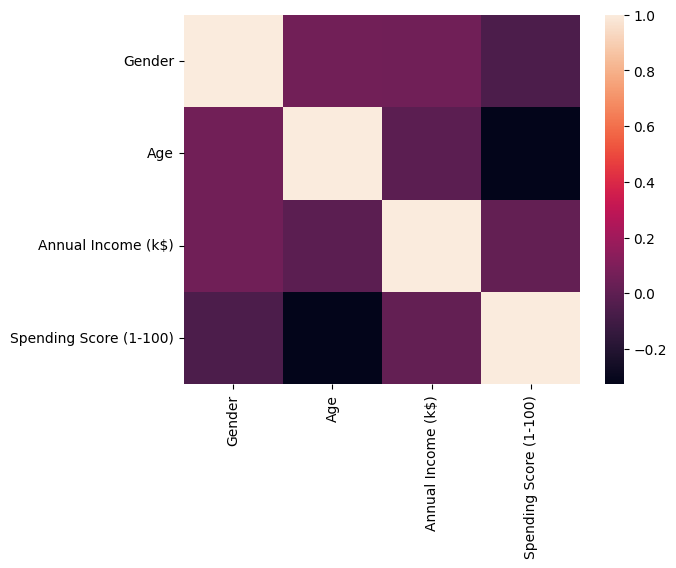

In [95]:
sns.heatmap(df.select_dtypes(include="number").corr())
plt.show()

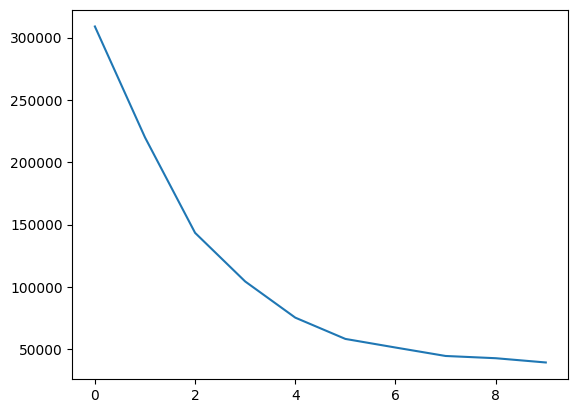

In [97]:
wcss = []
for i in range(1, 11):
  model = KMeans(i, init='k-means++', random_state=727)
  model.fit(df)
  wcss.append(model.inertia_)

sns.lineplot(wcss)
plt.show()

In [109]:
def kmeans(data: np.ndarray | pd.DataFrame, k: int = 5, rs: int = 727):
  model = KMeans(k, init='k-means++', random_state=rs)
  return model.fit_predict(data)

df_ohne_age = df.drop('Age', axis=1)

ss = StandardScaler()
df_scaled = ss.fit_transform(df_ohne_age)

predictions_normal = kmeans(df_ohne_age)
predictions_scaled = kmeans(df_scaled)

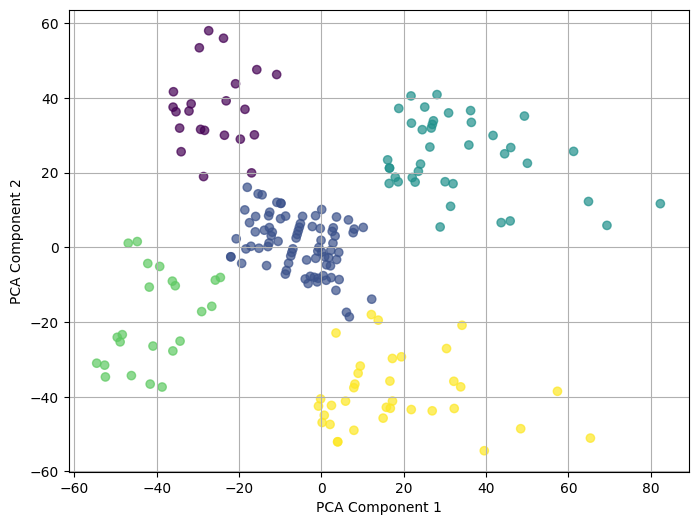

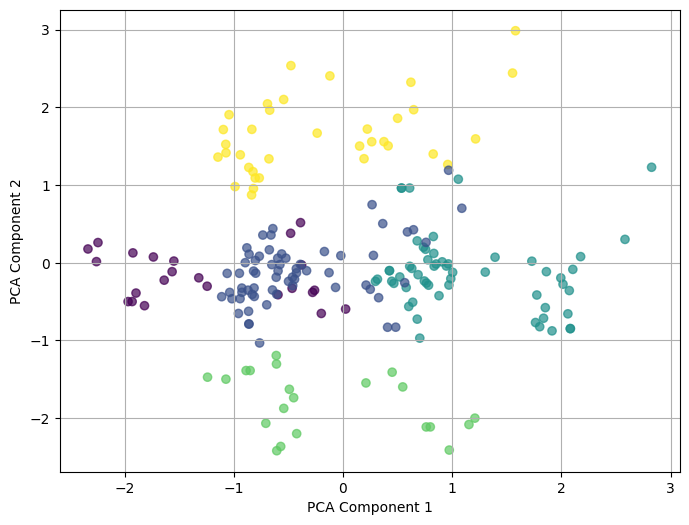

In [110]:
def plot_pca(data: np.ndarray | pd.DataFrame, predictions: np.ndarray):
  pca = PCA(n_components=2)
  data_2d = pca.fit_transform(data)

  plt.figure(figsize=(8, 6))
  plt.scatter(data_2d[:, 0], data_2d[:, 1], c=predictions, cmap='viridis', alpha=0.7)
  plt.xlabel("PCA Component 1")
  plt.ylabel("PCA Component 2")
  plt.grid(True)
  plt.show()

plot_pca(df_ohne_age, predictions_normal)
plot_pca(df_scaled, predictions_scaled)

The predictions with normal dataset without scaling appear to be more cluster-like than when scaling was performed
<br>I kind of expected scaling to draw better results but this does the opposite

## Task 2